# Corpus overview

## 1. Data preparation

In [2]:
%matplotlib inline

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

sns.set(style="whitegrid")

In [3]:
# open index file
project_root = Path("/Users/eugenia/Desktop/thesis/magic_tagger")

excel_path = project_root / "data" / "index" / "corpus_a_index.xlsx"
df = pd.read_excel(excel_path)

print(df.shape)
print("First rows:")
display(df.head())

(117, 29)
First rows:


,tale_id,collection,volume_no,source_ref,digital_carrier,rights_status,narrator,collector_1,collector_2,collector_3,...,content_description,genre_1,genre_2,genre_3,subgenre,folklore_category,type_code_1,type_code_2,type_code_3,type_code_4
0,era_vene_2_137_1,"ERA, Vene",2,"ERA, Vene 2, 137/44 (1)",scan_only,open,Nimi: Анна Мухина,Федор Коняев,NaN,NaN,...,Сказка про Аленушку и Степанушку.,muinasjutt,NaN,NaN,imemuinasjutt,NaN,450,NaN,NaN,NaN
1,era_vene_2_161_14,"ERA, Vene",2,"ERA, Vene 2, 161/5 (14)",scan_only,open,Nimi: Ан. Мухина,Федор Коняев,NaN,NaN,...,Сказка про царей.,muinasjutt,NaN,NaN,imemuinasjutt,NaN,707,NaN,NaN,NaN
2,era_vene_2_599_3,"ERA, Vene",2,"ERA, Vene 2, 599/605 (3)",scan_only,open,Nimi: неизвестно,Федор Коняев,NaN,NaN,...,Сказка о бедном и богатом. [Бедный купец жил п...,muinasjutt,NaN,NaN,imemuinasjutt,NaN,613,NaN,NaN,NaN
3,era_vene_2_605_4,"ERA, Vene",2,"ERA, Vene 2, 605/21 (4)",scan_only,open,"Nimi: Денисиха, Vanus/Sünniaasta: 75 л.",Федор Коняев,NaN,NaN,...,Сказка о Коле. [К царю приходят преступник и з...,muinasjutt,NaN,NaN,imemuinasjutt,NaN,NaN,NaN,NaN,NaN
4,era_vene_2_622_5,"ERA, Vene",2,"ERA, Vene 2, 622/6 (5)",scan_only,open,Nimi: Денисиха,Федор Коняев,NaN,NaN,...,Сказка об аленьком цветочке.,muinasjutt,NaN,NaN,imemuinasjutt,NaN,425C,NaN,NaN,NaN


In [4]:
# Total number of rows in the table
total_rows = len(df)

# Number of unique tales by tale_id
unique_tales = df["tale_id"].nunique()

print(f"Total rows in table: {total_rows}")
print(f"Unique tales (by tale_id): {unique_tales}")

Total rows in table: 117
Unique tales (by tale_id): 117


In [5]:
# Check if there are any fully duplicated rows (all columns equal)
df.duplicated().any()

# Count fully duplicated rows
df.duplicated().sum()


np.int64(0)

In [6]:
# checking data types
print(df.dtypes)


tale_id                           object
collection                        object
volume_no                          int64
source_ref                        object
digital_carrier                   object
rights_status                     object
narrator                          object
collector_1                       object
collector_2                       object
collector_3                       object
collector_4                       object
collector_5                       object
narrator_school                   object
recording_parish                  object
recording_place                   object
narrator_origin_parish            object
narrator_origin_place             object
recorded_date_start               object
recorded_date_end         datetime64[ns]
content_description               object
genre_1                           object
genre_2                           object
genre_3                           object
subgenre                          object
folklore_categor

In [7]:
# checking missing values
df.isna().sum()

tale_id                     0
collection                  0
volume_no                   0
source_ref                  0
digital_carrier             0
rights_status               0
narrator                    2
collector_1                 0
collector_2                96
collector_3               107
collector_4               109
collector_5               115
narrator_school           102
recording_parish            0
recording_place            11
narrator_origin_parish    101
narrator_origin_place     101
recorded_date_start         0
recorded_date_end          97
content_description         1
genre_1                     0
genre_2                   103
genre_3                   116
subgenre                    0
folklore_category         110
type_code_1                19
type_code_2                89
type_code_3               111
type_code_4               114
dtype: int64

All fairy tales have collection and volume reference, so we can make visualisations about their spreading across archive collections. 

## 2. Visualisations

### 1. Graph "Texts quantity in collections"

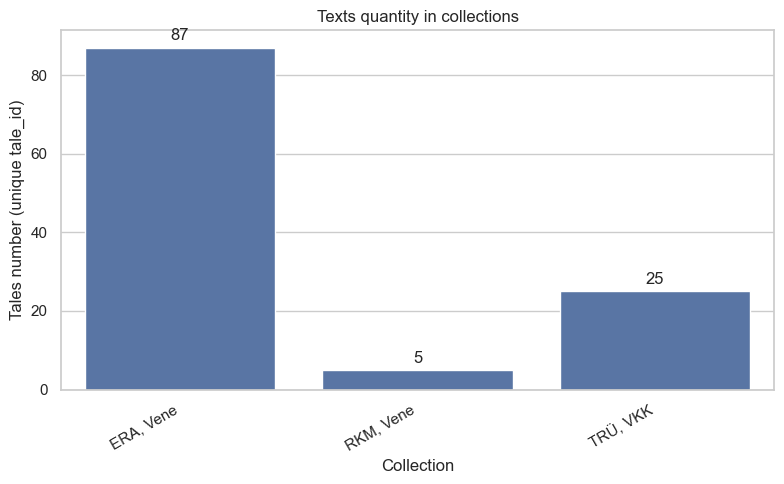

In [8]:

coll_counts = (
    df.groupby("collection")["tale_id"]
      .nunique()
      .reset_index(name="n_tales")
)

fig, ax = plt.subplots(figsize=(8, 5))

# Barplot
sns.barplot(data=coll_counts, x="collection", y="n_tales", ax=ax)

# Titles and labels
ax.set_title("Texts quantity in collections")
ax.set_xlabel("Collection")
ax.set_ylabel("Tales number (unique tale_id)")
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")


# Add value labels above each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.annotate(
        f"{int(height)}",                               
        (patch.get_x() + patch.get_width() / 2, height), 
        ha="center",
        va="bottom",
        fontsize=12,
        xytext=(0, 3),                                   
        textcoords="offset points"
    )

fig.tight_layout()

# Save figure
output_path = project_root / "notebooks" / "figures" / "corpus_by_collection.png"
fig.savefig(output_path, dpi=300, bbox_inches="tight")

# Show in notebook
plt.show();

### 2. Graph "Texts quantity in collection volumes"

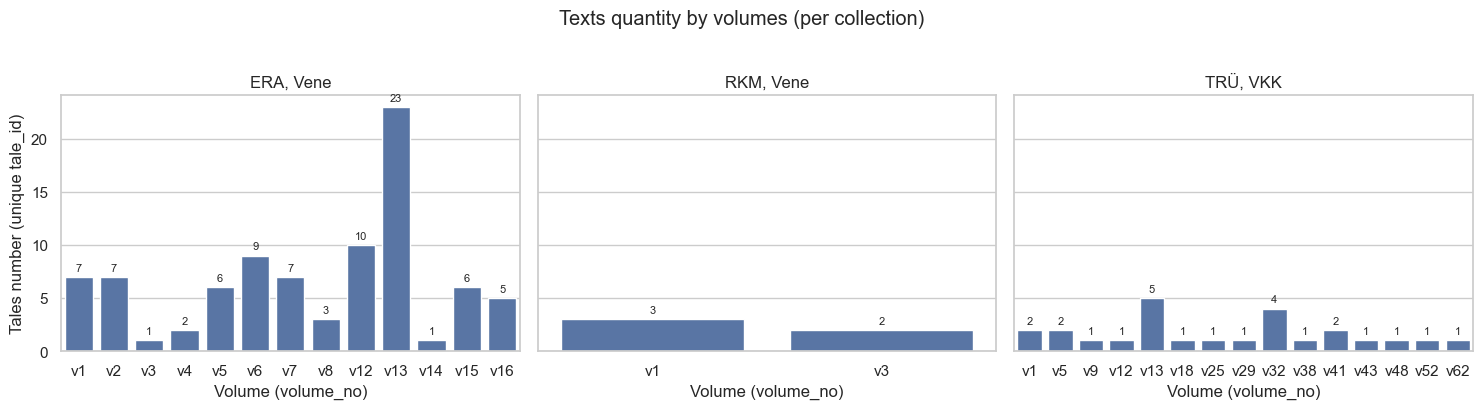

In [9]:
# Aggregate data: tales per collection and volume
cv_counts = (
    df.groupby(["collection", "volume_no"])["tale_id"]
      .nunique()
      .reset_index(name="n_tales")
      .sort_values(["collection", "volume_no"])
)

# Unique collections in the data
collections = cv_counts["collection"].unique()

# Create one subplot per collection
fig, axes = plt.subplots(
    1, len(collections),
    figsize=(5 * len(collections), 4),
    sharey=True
)

# If there is only one collection, axes is not an array
if len(collections) == 1:
    axes = [axes]

for ax, coll in zip(axes, collections):
    # Subset data for this collection
    sub = (
        cv_counts[cv_counts["collection"] == coll]
        .sort_values("volume_no")
    )

    # Barplot: x = volume_no, y = n_tales
    sns.barplot(
        data=sub,
        x="volume_no",
        y="n_tales",
        ax=ax
    )

    # Set titles and labels
    ax.set_title(f"{coll}")
    ax.set_xlabel("Volume (volume_no)")
    ax.set_ylabel("Tales number (unique tale_id)")

    # Replace x-tick labels with v1, v2, ...
    xticks = ax.get_xticks()
    xlabels = [f"v{int(v)}" for v in sub["volume_no"]]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, rotation=0)

    # Add count labels above bars
    for patch in ax.patches:
        height = patch.get_height()
        x_center = patch.get_x() + patch.get_width() / 2
        ax.annotate(
            f"{int(height)}",
            (x_center, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=8
        )

fig.suptitle("Texts quantity by volumes (per collection)", y=1.02)
fig.tight_layout()

facets_path = project_root / "notebooks" / "figures" / "corpus_by_collection_volume_facets.png"
fig.savefig(facets_path, dpi=300, bbox_inches="tight")

plt.show();


In [10]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tale_id                 117 non-null    object        
 1   collection              117 non-null    object        
 2   volume_no               117 non-null    int64         
 3   source_ref              117 non-null    object        
 4   digital_carrier         117 non-null    object        
 5   rights_status           117 non-null    object        
 6   narrator                115 non-null    object        
 7   collector_1             117 non-null    object        
 8   collector_2             21 non-null     object        
 9   collector_3             10 non-null     object        
 10  collector_4             8 non-null      object        
 11  collector_5             2 non-null      object        
 12  narrator_school         15 non-null     object    

### 3. Graph "Distribution by decade"

In [11]:
# Helper function to parse different date formats safely
def parse_recorded_date(value):
    """Parse recorded date; accept full dates and bare years like '1967'."""
    if pd.isna(value):
        return pd.NaT
    value = str(value).strip()
    if value == "":
        return pd.NaT
    
    # Bare year like '1967'
    if value.isdigit() and len(value) == 4:
        return pd.to_datetime(value + "-01-01", format="%Y-%m-%d", errors="coerce")
    
    # General fallback: DD.MM.YYYY, YYYY-MM-DD, etc.
    return pd.to_datetime(value, errors="coerce", dayfirst=True)

# Parse recorded_date_start using the helper
df["recorded_date_start"] = df["recorded_date_start"].apply(parse_recorded_date)

# If recorded_date_end is not datetime yet, you can also normalize it:
if df["recorded_date_end"].dtype == "object":
    df["recorded_date_end"] = df["recorded_date_end"].apply(parse_recorded_date)

print(df[["recorded_date_start", "recorded_date_end"]].dtypes)
df[["recorded_date_start", "recorded_date_end"]].head(20)

recorded_date_start    datetime64[ns]
recorded_date_end      datetime64[ns]
dtype: object


/var/folders/nz/yywgk_ls04v00rkrpy10kv580000gn/T/ipykernel_32577/124623206.py:15: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(value, errors="coerce", dayfirst=True)


,recorded_date_start,recorded_date_end
0,1928-01-01,NaT
1,1928-01-01,NaT
2,1928-01-01,NaT
3,1928-01-01,NaT
4,1928-01-01,NaT
5,1928-01-01,NaT
6,1928-01-01,NaT
7,1933-01-01,NaT
8,1933-01-01,NaT
9,1934-01-01,NaT


In [12]:
# Mask for undated tales
undated_mask = df["recorded_date_start"].isna() & df["recorded_date_end"].isna()
undated_tales = df.loc[undated_mask, "tale_id"].nunique()

# Use start date, fallback to end date
df["recorded_date_effective"] = df["recorded_date_start"].fillna(df["recorded_date_end"])

df_years = df.dropna(subset=["recorded_date_effective"]).copy()
df_years["year"] = df_years["recorded_date_effective"].dt.year
df_years["decade_start"] = (df_years["year"] // 10) * 10
df_years["decade_label"] = df_years["decade_start"].astype(int).astype(str) + "s"

In [13]:
diagnostic_table = df_years[
    ["tale_id", "collection",
     "recorded_date_start", "recorded_date_end",
     "recorded_date_effective", "year", "decade_label"]
].sort_values(["recorded_date_effective", "tale_id"])

display(diagnostic_table.head(50))

,tale_id,collection,recorded_date_start,recorded_date_end,recorded_date_effective,year,decade_label
0,era_vene_2_137_1,"ERA, Vene",1928-01-01,NaT,1928-01-01,1928,1920s
1,era_vene_2_161_14,"ERA, Vene",1928-01-01,NaT,1928-01-01,1928,1920s
2,era_vene_2_599_3,"ERA, Vene",1928-01-01,NaT,1928-01-01,1928,1920s
3,era_vene_2_605_4,"ERA, Vene",1928-01-01,NaT,1928-01-01,1928,1920s
4,era_vene_2_622_5,"ERA, Vene",1928-01-01,NaT,1928-01-01,1928,1920s
5,era_vene_2_642_9,"ERA, Vene",1928-01-01,NaT,1928-01-01,1928,1920s
6,era_vene_2_748_27,"ERA, Vene",1928-01-01,NaT,1928-01-01,1928,1920s
47,era_vene_1_309_38,"ERA, Vene",1929-07-27,NaT,1929-07-27,1929,1920s
49,era_vene_1_497_1,"ERA, Vene",1930-05-24,NaT,1930-05-24,1930,1930s
50,era_vene_1_503_1,"ERA, Vene",1930-05-24,NaT,1930-05-24,1930,1930s


In [14]:
# Count unique tales per decade (dated tales only)
decade_counts = (
    df_years.groupby("decade_label")["tale_id"]
    .nunique()
    .sort_index()
)

# Undated tales: neither start nor end date is available
undated_mask = df["recorded_date_start"].isna() & df["recorded_date_end"].isna()
undated_tales = df.loc[undated_mask, "tale_id"].nunique()
print(f"Undated tales (no recorded_date_start or recorded_date_end): {undated_tales}")

print("Tales per decade (dated only):")
display(decade_counts.to_frame(name="n_tales"))

Undated tales (no recorded_date_start or recorded_date_end): 0
Tales per decade (dated only):


,n_tales
decade_label,
1920s,8
1930s,67
1940s,17
1960s,25


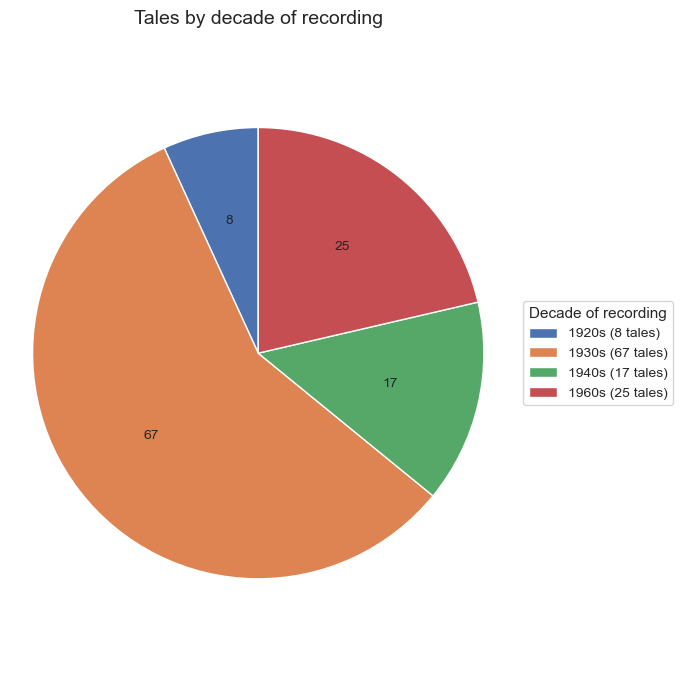

In [15]:
def make_autopct(values):
    """Return a function that formats pie labels as absolute counts."""
    def _autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f"{val}"
    return _autopct

fig, ax = plt.subplots(figsize=(7, 7))

# Pie chart for decades 
wedges, texts, autotexts = ax.pie(
    decade_counts.values,
    labels=None,                         
    autopct=make_autopct(decade_counts.values),
    startangle=90,
    textprops={"fontsize": 10}
)

ax.set_title("Tales by decade of recording", fontsize=14)

# Legend with decade labels and counts
legend_labels = [
    f"{decade} ({count} tales)"
    for decade, count in decade_counts.items()
]

ax.legend(
    wedges,
    legend_labels,
    title="Decade of recording",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=10,
    title_fontsize=11
)

ax.axis("equal")  

fig.tight_layout()

decades_path = project_root / "notebooks" / "figures" / "corpus_by_decades.png"
fig.savefig(decades_path, dpi=300, bbox_inches="tight")

plt.show();

### 4. Graph "Distribution by  country"

In [16]:
def extract_unique_places(df, columns, dropna=True, sort=True, strip=True):
    """
    Extract a sorted list of unique place names from one or several columns.
    
    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe with place columns.
    columns : list of str
        Column names that contain place names.
    dropna : bool, optional
        Whether to drop missing values, by default True.
    sort : bool, optional
        Whether to sort the resulting list, by default True.
    strip : bool, optional
        Whether to strip whitespace from place names, by default True.
    
    Returns
    -------
    list of str
        List of unique place names across the specified columns.
    """
    values = []
    
    for col in columns:
        if col not in df.columns:
            print(f"Warning: column '{col}' not found in dataframe")
            continue
        
        col_values = df[col]
        
        # convert to string and optionally strip whitespace
        col_values = col_values.astype("string")
        if strip:
            col_values = col_values.str.strip()
        
        if dropna:
            col_values = col_values.dropna()
        
        values.extend(col_values.tolist())
    
    # keep unique values
    unique_values = list(set(values))
    
    if sort:
        unique_values = sorted(unique_values)
    
    return unique_values

place_columns = ["recording_parish", "recording_place", "narrator_origin_parish", "narrator_origin_place"]

unique_places = extract_unique_places(df, place_columns)

print(f"Number of unique place names: {len(unique_places)}")
unique_places[:10]

Number of unique place names: 69


['Iisaku khk.',
 'Irboska v.',
 'Irboska v., Irboska k.',
 'Irboska v., Miltsõ k.',
 'Irboska v., Mõla (Малы) k.',
 'Irboska v., Vana-Irboska k.',
 'Irboska v., Vastsõ k.',
 'Irboska v., Velje k.',
 'Jõhvi khk.',
 'Kalda v., Kolpino (Колпино) k.']

In [17]:
# create a dataframe for saving translations
places_df = pd.DataFrame({
    "place_original": unique_places
})

# empty column to be filled manually with English names
places_df["place_english"] = ""

# save for manual editing
places_df.to_csv(project_root / "data" / "processed" / "places_translation_template.csv", index=False)

places_df.head()

,place_original,place_english
0,Iisaku khk.,
1,Irboska v.,
2,"Irboska v., Irboska k.",
3,"Irboska v., Miltsõ k.",
4,"Irboska v., Mõla (Малы) k.",


In [18]:

def add_place_translations(
    df: pd.DataFrame,
    places_df: pd.DataFrame,
    place_original_col: str = "place_original",
    place_english_col: str = "place_english",
    region_col: str = "region_english",
    country_col: str = "country_english",
) -> pd.DataFrame:
    """
    Enrich the main tales dataframe with English place names and region/country info.
    
    New columns added:
      - recording_parish_english
      - recording_place_english
      - narrator_origin_parish_english
      - narrator_origin_place_english
      - region_english
      - country_english
    """
    
    # --- Preparing transltions table
    pl = places_df.copy()
    if place_original_col not in pl.columns:
        raise ValueError(f"places_df must contain '{place_original_col}' column")
    if place_english_col not in pl.columns:
        raise ValueError(f"places_df must contain '{place_english_col}' column")
    
    if region_col not in pl.columns:
        pl[region_col] = pd.NA
    if country_col not in pl.columns:
        pl[country_col] = pd.NA

   
    pl[place_original_col] = pl[place_original_col].astype("string").str.strip()
    pl_indexed = pl.set_index(place_original_col)

    df_out = df.copy()

    col_map = {
        "recording_parish": "recording_parish_english",
        "recording_place": "recording_place_english",
        "narrator_origin_parish": "narrator_origin_parish_english",
        "narrator_origin_place": "narrator_origin_place_english",
    }

    for src_col, new_col in col_map.items():
        if src_col not in df_out.columns:
            print(f"Warning: column '{src_col}' not found in df, skipping")
            continue

        key_series = df_out[src_col].astype("string").str.strip()

        df_out[new_col] = key_series.map(pl_indexed[place_english_col])

    # --- Region English & Country English ---
    priority_cols = [
        "recording_place",
        "recording_parish",
        "narrator_origin_place",
        "narrator_origin_parish",
    ]
    existing_priority_cols = [c for c in priority_cols if c in df_out.columns]

    if existing_priority_cols:
        def first_nonempty(values):
            for val in values:
                if pd.notna(val):
                    val_str = str(val).strip()
                    if val_str:
                        return val_str
            return pd.NA

        key_for_region = df_out[existing_priority_cols].apply(first_nonempty, axis=1)
        key_for_region = key_for_region.astype("string").str.strip()

        df_out["region_english"] = key_for_region.map(pl_indexed[region_col])
        df_out["country_english"] = key_for_region.map(pl_indexed[country_col])
    else:
        df_out["region_english"] = pd.NA
        df_out["country_english"] = pd.NA

    return df_out


In [19]:
places_path = project_root / "data" / "processed" / "places_translation.csv"

places_df = pd.read_csv(places_path, sep=";", dtype=str)

print(places_df.columns)

Index(['place_original', 'place_english', 'region_english', 'country_english'], dtype='object')


In [20]:
df_enriched = add_place_translations(df, places_df)


df_enriched[
    [
        "recording_parish", "recording_parish_english",
        "recording_place", "recording_place_english",
        "narrator_origin_parish", "narrator_origin_parish_english",
        "narrator_origin_place", "narrator_origin_place_english",
        "region_english", "country_english",
    ]
].tail(20)

,recording_parish,recording_parish_english,recording_place,recording_place_english,narrator_origin_parish,narrator_origin_parish_english,narrator_origin_place,narrator_origin_place_english,region_english,country_english
97,Petserimaa,Petseri County,"Изборская волость, д. Старый Изборск",Izborsk,NaN,NaN,NaN,NaN,Pskov Oblast,Russia
98,Petserimaa,Petseri County,"Изборская волость, д. Петровка",Petrovka village,NaN,NaN,NaN,NaN,Pskov Oblast,Russia
99,Petserimaa,Petseri County,"Изборская волость, д. Баршевицы",Barshevitsy village,NaN,NaN,NaN,NaN,Pskov Oblast,Russia
100,Petserimaa,Petseri County,"Изборская волость, д. Баршевицы",Barshevitsy village,NaN,NaN,NaN,NaN,Pskov Oblast,Russia
101,Petserimaa,Petseri County,"Изборская волость, д. Зуево",Zuevo village,NaN,NaN,NaN,NaN,Pskov Oblast,Russia
102,Petserimaa,Petseri County,"Изборская волость, д. Зуево",Zuevo village,NaN,NaN,NaN,NaN,Pskov Oblast,Russia
103,Torma khk.,Torma parish,"Kasepää v., Kükita (Кюкита) k.",Kyukita village,Torma khk.,Torma parish,"Kasepää v., Tiheda (Тихотка) k.",Tiheda village,Jõgeva County,Estonia
104,Torma khk.,Torma parish,"Kasepää v., Kükita (Кюкита) k.",Kyukita village,Torma khk.,Torma parish,"Kasepää v., Tiheda (Тихотка) k.",Tiheda village,Jõgeva County,Estonia
105,Torma khk.,Torma parish,"Kasepää v., Tiheda (Тихотка) k.",Tiheda village,NaN,NaN,NaN,NaN,Jõgeva County,Estonia
106,välismaa,abroad,"Venemaa, Pihkva obl., Pihkva raj., Belova nim....",Belov Island (imeni Belova),NaN,NaN,NaN,NaN,Pskov Oblast,Russia


In [21]:
# save 
df_enriched.to_csv(project_root / "data" / "processed" / "index_with_places.csv", index=False)


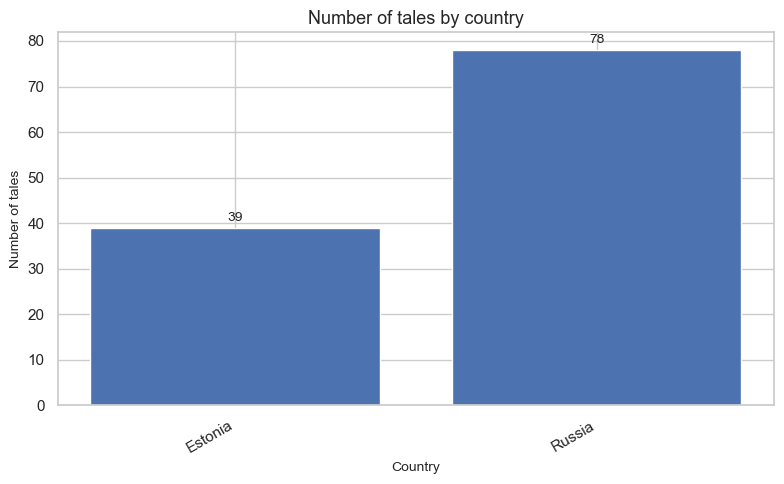

In [22]:
by_country = (
    df_enriched.groupby("country_english")["tale_id"]
      .nunique()
      .reset_index(name="n_tales")
)

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(by_country["country_english"], by_country["n_tales"])

for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f"{int(height)}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=10,
    )

ax.set_xlabel("Country", fontsize=10)
ax.set_ylabel("Number of tales", fontsize=10)
ax.set_title("Number of tales by country", fontsize=13)

plt.xticks(rotation=30, ha="right")

fig.tight_layout()

countries_path = project_root / "notebooks" / "figures" / "corpus_by_countries.png"
fig.savefig(countries_path, dpi=300, bbox_inches="tight")

plt.show();


### 5. Graph "Texts Distribution by region"

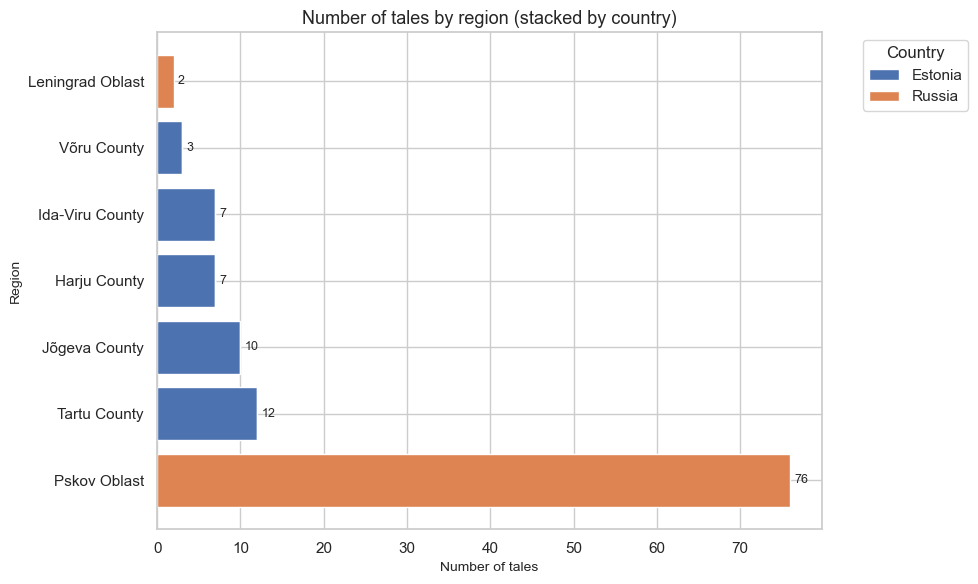

In [23]:
# Aggregate data: unique tales per region and country
by_region_country = (
    df_enriched
    .groupby(["region_english", "country_english"])["tale_id"]
    .nunique()
    .reset_index(name="n_tales")
)

# Pivot to wide format for a stacked horizontal bar chart
pivot = by_region_country.pivot_table(
    index="region_english",
    columns="country_english",
    values="n_tales",
    aggfunc="sum",
    fill_value=0,
)

# Sort regions by total number of tales 
pivot["total"] = pivot.sum(axis=1)
pivot = pivot.sort_values("total", ascending=False)
pivot = pivot.drop(columns="total")

regions = pivot.index
countries = pivot.columns
y_pos = np.arange(len(regions))

# create stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

left = np.zeros(len(regions))  

for country in countries:
    values = pivot[country].values
    bars = ax.barh(
        y_pos,
        values,
        left=left,
        label=country,
    )
    left += values  

total_values = pivot.sum(axis=1).values

for y, total in zip(y_pos, total_values):
    ax.text(
        total + 0.5,          
        y,
        str(int(total)),
        va="center",
        fontsize=9,
    )

ax.set_yticks(y_pos)
ax.set_yticklabels(regions)

ax.set_xlabel("Number of tales", fontsize=10)
ax.set_ylabel("Region", fontsize=10)
ax.set_title("Number of tales by region (stacked by country)", fontsize=13)

ax.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

fig.tight_layout()

regions_path = project_root / "notebooks" / "figures" / "corpus_by_regions_stacked_by_country.png"
fig.savefig(regions_path, dpi=300, bbox_inches="tight")

plt.show()

### 6. Graph "Collections distribution by region"

In [24]:
# 6) Graph "Collections distribution by region"
# aggregate data: unique tales per country, region, collection
hier_df = (
    df_enriched
    .groupby(["country_english", "region_english", "collection"])["tale_id"]
    .nunique()
    .reset_index(name="n_tales")
)

fig_sunburst = px.sunburst(
    hier_df,
    path=["country_english", "region_english", "collection"],  # hierarchy
    values="n_tales",
    color="country_english",
    title="Tales by Country → Region → Collection (Sunburst)",
)

fig_sunburst.update_traces(
    hovertemplate=(
        "<b>%{label}</b><br>" +
        "Tales: %{value}<extra></extra>"
    )
)

fig_sunburst.show()

sunburst_path = project_root / "notebooks" / "figures" / "country_region_collection.png"
fig_sunburst.write_image(sunburst_path, scale=2)


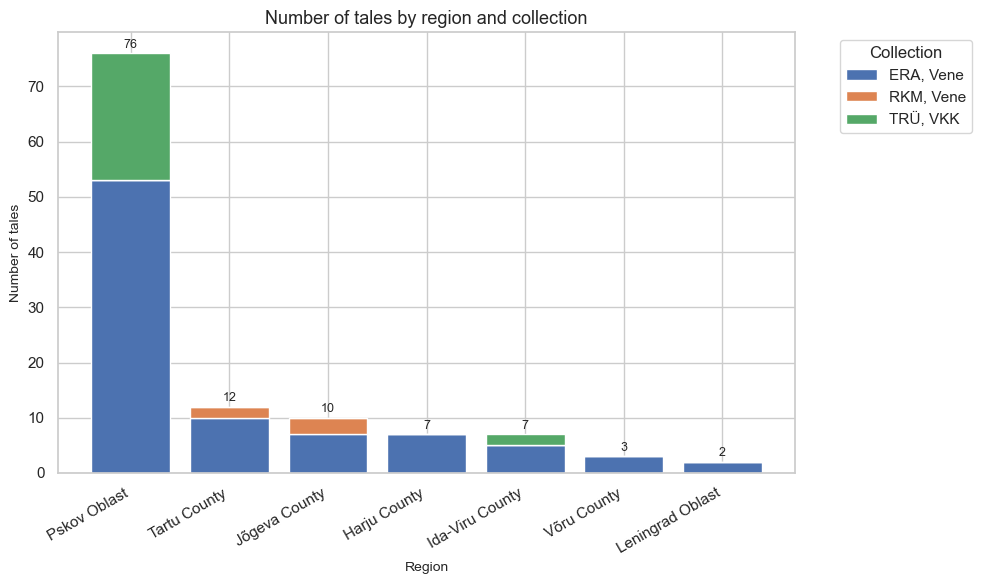

In [25]:
# aggregate data: unique tales per region and collection
by_region_collection = (
    df_enriched
    .groupby(["region_english", "collection"])["tale_id"]
    .nunique()
    .reset_index(name="n_tales")
)

# Pivot to wide format for a stacked bar chart:
pivot_rc = by_region_collection.pivot_table(
    index="region_english",
    columns="collection",
    values="n_tales",
    aggfunc="sum",
    fill_value=0,
)

# sort regions by total number of tales 
pivot_rc["total"] = pivot_rc.sum(axis=1)
pivot_rc = pivot_rc.sort_values("total", ascending=False)
pivot_rc = pivot_rc.drop(columns="total")

regions = pivot_rc.index
collections = pivot_rc.columns
x_pos = np.arange(len(regions))

# create stacked vertical bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bottom = np.zeros(len(regions))  

for col in collections:
    values = pivot_rc[col].values
    bars = ax.bar(
        x_pos,
        values,
        bottom=bottom,
        label=col,
    )
    bottom += values  

# add total labels at the top 
total_values = pivot_rc.sum(axis=1).values

for x, total in zip(x_pos, total_values):
    ax.text(
        x,
        total + 0.5,     
        str(int(total)),
        ha="center",
        va="bottom",
        fontsize=9,
    )

ax.set_xticks(x_pos)
ax.set_xticklabels(regions, rotation=30, ha="right")

ax.set_xlabel("Region", fontsize=10)
ax.set_ylabel("Number of tales", fontsize=10)
ax.set_title("Number of tales by region and collection", fontsize=13)

ax.legend(title="Collection", bbox_to_anchor=(1.05, 1), loc="upper left")

fig.tight_layout()

collections_regions_path = project_root / "notebooks" / "figures" / "corpus_collections_by_region.png"
fig.savefig(collections_regions_path, dpi=300, bbox_inches="tight")

plt.show()